Let's start by some imports: stats and basic numerical operations.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing 

The data lives in one big csv file. Let's read that in a pandas data frame:

In [2]:
path_data = 'data_files/Csub_correlation.csv'
data = pd.read_csv(path_data)
data

,Network,Sites,Correlation,Days_Apart,Scanner1,Scanner2,Scanner_Label
0,DMN,CHUM1 vs CHUM2,0.80,873,Philips,Philips,PhilipsPhilips
1,DMN,CHUM1 vs CHUS1,0.61,112,Philips,Philips,PhilipsPhilips
2,DMN,CHUM1 vs CHUS2,0.71,293,Philips,Philips,PhilipsPhilips
3,DMN,CHUM1 vs CHUS3,0.63,854,Philips,Philips,PhilipsPhilips
4,DMN,CHUM1 vs CINQ1,0.71,22,Philips,Philips,PhilipsPhilips
5,DMN,CHUM1 vs CINQ2,0.48,281,Philips,Philips,PhilipsPhilips
6,DMN,CHUM1 vs CINQ3,0.78,867,Philips,Philips,PhilipsPhilips
7,DMN,CHUM1 vs UBC1,0.67,823,Philips,Philips,PhilipsPhilips
8,DMN,CHUM1 vs IUGM1,0.68,43,Philips,Siemens,PhilipsSiemens
9,DMN,CHUM1 vs IUGM2,0.63,250,Philips,Siemens,PhilipsSiemens


The labels for each comparison are built as "SITEN vs SITEM", where N and M are 1-index integers. We are going to create six new columns: 
 * one with the name of the 1st site ("site1"), 
 * one with the name of the second site ("site2"), 
 * one with the number of the visit for the 1st site ("visit1", 1-indexed, string) 
 * one with the number of the visit for the second site ("visit2", 1-indexed, string)
 * one with the ID of the 1st visit ("id1")
 * one with the ID of the 2st visit ("id2")


In [3]:
list_comp = data['Sites']
ll = 0
for comp in list_comp: 
    tmp = comp.split(' ')
    data.loc[ll,"id1"] = tmp[0]
    data.loc[ll,"visit1"] = tmp[0][-1]
    data.loc[ll,"site1"] = tmp[0].rstrip(tmp[0][-1])    
    data.loc[ll,"id2"] = tmp[2]
    data.loc[ll,"visit2"] = tmp[2][-1]
    data.loc[ll,"site2"] = tmp[2].rstrip(tmp[2][-1])
    ll += 1
data

,Network,Sites,Correlation,Days_Apart,Scanner1,Scanner2,Scanner_Label,id1,visit1,site1,id2,visit2,site2
0,DMN,CHUM1 vs CHUM2,0.80,873,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,CHUM2,2,CHUM
1,DMN,CHUM1 vs CHUS1,0.61,112,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,CHUS1,1,CHUS
2,DMN,CHUM1 vs CHUS2,0.71,293,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,CHUS2,2,CHUS
3,DMN,CHUM1 vs CHUS3,0.63,854,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,CHUS3,3,CHUS
4,DMN,CHUM1 vs CINQ1,0.71,22,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,CINQ1,1,CINQ
5,DMN,CHUM1 vs CINQ2,0.48,281,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,CINQ2,2,CINQ
6,DMN,CHUM1 vs CINQ3,0.78,867,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,CINQ3,3,CINQ
7,DMN,CHUM1 vs UBC1,0.67,823,Philips,Philips,PhilipsPhilips,CHUM1,1,CHUM,UBC1,1,UBC
8,DMN,CHUM1 vs IUGM1,0.68,43,Philips,Siemens,PhilipsSiemens,CHUM1,1,CHUM,IUGM1,1,IUGM
9,DMN,CHUM1 vs IUGM2,0.63,250,Philips,Siemens,PhilipsSiemens,CHUM1,1,CHUM,IUGM2,2,IUGM


# List of relevant variables (scan, site, scanner, network)
Let's extract the labels of the network, the ID for each scan, as well as a list of sites:

In [4]:
list_site = np.unique([data.site1.values.flatten() , data.site2.values.flatten()])
list_id = np.unique([data.id1.values.flatten() , data.id2.values.flatten()])
list_net = np.unique(data.Network.values.flatten())
list_scanner = np.unique([data.Scanner1.values.flatten() , data.Scanner2.values.flatten()])
print('Number of scans: %i \nNumber of sites: %i\nNumber of networks: %i\nNumber of scanner types: %i' 
      % (list_id.size , list_site.size, list_net.size , list_scanner.size))

Number of scans: 24 
Number of sites: 13
Number of networks: 7
Number of scanner types: 3


Alright, so now we can check that it all makes sense. There are 24 different scans here for 7 networks (and the data was acquired across 13 sites). There are `24*23/2` different comparisons between pairs of distinct scans, for 7 networks, for a total of 1932 comparisons:

In [5]:
24*23/2*7

1932.0

# Building matrices
## Spatial similarity
Now, we are going to build the whole matrix of inter-scan comparisons for each network:

In [14]:
all_comp = {}
for net in list_net:
    all_comp[net] = np.zeros([list_id.size,list_id.size])
    for id1 in list_id:
        for id2 in list_id:
            mask = data.id1.isin([id1 , id2]) & data.id2.isin([id1 , id2])
            mask = mask & (data.Network==net)
            if any(mask):
                all_comp[net][list_id==id1,list_id==id2] = data.Correlation[mask]
            
                

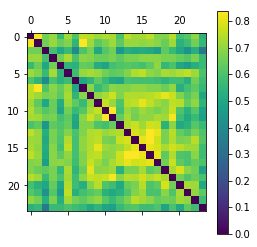

In [15]:
plt.matshow(all_comp['MOT'])
plt.colorbar()

# tSNR

we need to load another auxiliary file for this measure.

In [7]:
path_aux = 'data_files/Csub_tsnr_time_motion.csv'
aux = pd.read_csv(path_aux)
aux

,Time,Scan_dates,Visit,Site,id,tSNR_raw,Scanner,FD,FD_scrubbed,Total_volume,Volumes_scrubbed,Volumes_remaining
0,44,7/3/14,1,CHUM,CHUM1,100.891228,Philips,0.184465,0.182316,297,4,293
1,917,11/22/16,2,CHUM,CHUM2,85.067749,Philips,0.249586,0.225795,297,42,255
2,156,10/23/14,1,CHUS,CHUS1,79.841675,Philips,0.177949,0.174218,297,8,289
3,337,4/22/15,2,CHUS,CHUS2,78.079979,Philips,0.246182,0.213796,297,91,206
4,898,11/3/16,3,CHUS,CHUS3,77.908920,Philips,0.251286,0.232445,297,34,263
5,22,6/11/14,1,CINQ,CINQ1,90.081963,Philips,0.289165,0.246616,297,86,211
6,325,4/10/15,2,CINQ,CINQ2,94.104416,Philips,0.301787,0.208972,297,118,179
7,911,11/16/16,3,CINQ,CINQ3,90.639122,Philips,0.217974,0.183525,297,41,256
8,924,11/29/16,1,EDM,EDM1,78.860901,Siemens,0.188473,0.188473,297,0,297
9,0,5/20/14,1,ISMD,ISMD1,78.443268,Siemens,0.082451,0.082451,297,0,297


In [10]:
all_tsnr = np.zeros([list_id.size,list_id.size])
net = "MOT"
for id1 in list_id:
    for id2 in list_id:
        mask = aux.id == id1
        if np.any(mask):
            all_tsnr[list_id==id1,list_id==id2] = aux.tSNR_raw[aux.id == id1]
            

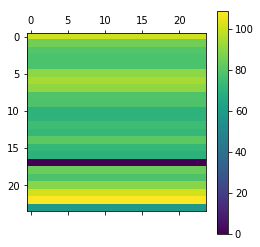

In [12]:
plt.matshow(all_tsnr)
plt.colorbar()

In [17]:
il = np.tril_indices(all_comp['MOT'].shape[0],-1)
Xtsnr = preprocessing.scale(all_tsnr[il], with_std=True)
Xtsnr = Xtsnr.reshape([Xtsnr.size,1])

## Time between scans

In [20]:
all_time = np.zeros([list_id.size,list_id.size])
net = "MOT"
for id1 in list_id:
    for id2 in list_id:
        mask = data.id1.isin([id1 , id2]) & data.id2.isin([id1 , id2])
        mask = mask & (data.Network==net)
        if any(mask):
            all_time[list_id==id1,list_id==id2] = data.Days_Apart[mask]

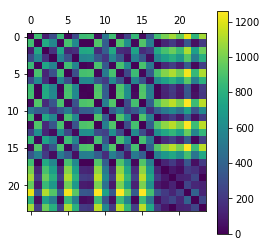

In [21]:
plt.matshow(all_time)
plt.colorbar()

In [22]:
Xt = preprocessing.scale(all_time[il], with_std=False) / 365
Xt = Xt.reshape([Xt.size,1])

# Frame displacement

In [23]:
all_fd = np.zeros([list_id.size,list_id.size])
net = "MOT"
for id1 in list_id:
    for id2 in list_id:
        mask = aux.id == id1
        if np.any(mask):
            all_fd[list_id==id1,list_id==id2] = aux.FD_scrubbed[aux.id == id1]
            

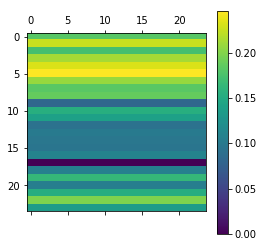

In [24]:
plt.matshow(all_fd)
plt.colorbar()

In [25]:
il = np.tril_indices(all_comp['MOT'].shape[0],-1)
Xfd = preprocessing.scale(all_fd[il], with_std=True)
Xfd = Xfd.reshape([Xfd.size,1])

# Number of time frames

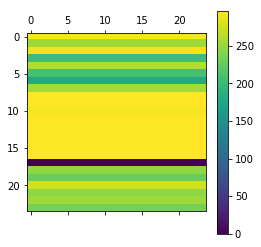

In [26]:
all_vol = np.zeros([list_id.size,list_id.size])
net = "MOT"
for id1 in list_id:
    for id2 in list_id:
        mask = aux.id == id1
        if np.any(mask):
            all_vol[list_id==id1,list_id==id2] = aux.Volumes_remaining[aux.id == id1]
plt.matshow(all_vol)
plt.colorbar()            

In [27]:
il = np.tril_indices(all_comp['MOT'].shape[0],-1)
Xvol = preprocessing.scale(all_vol[il], with_std=True)
Xvol = Xvol.reshape([Xvol.size,1])

## Site dummy variables

In [28]:
net = "MOT"
all_site = np.zeros([list_id.size,list_id.size,list_site.size])
for id1 in list_id:
    for id2 in list_id:
        mask = data.id1.isin([id1 , id2]) & data.id2.isin([id1 , id2])
        mask = mask & (data.Network==net)        
        if any(mask):
            site1 = data.site1[mask].values
            site2 = data.site2[mask].values
            all_site[list_id==id1,list_id==id2,list_site==site1] = site1==site2

Site: CHUM
Site: CHUS
Site: CINQ
Site: EDM
Site: ISMD
Site: IUGM
Site: MNI
Site: RRI
Site: SASK
Site: SUN
Site: TWH
Site: UBC
Site: VIC


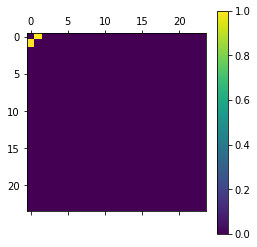

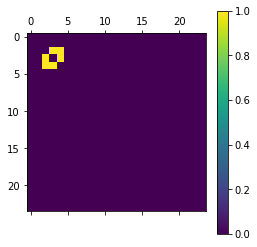

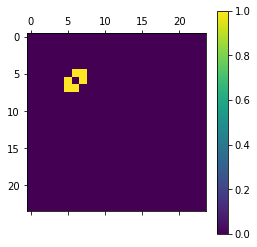

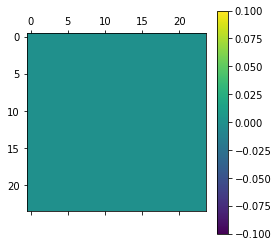

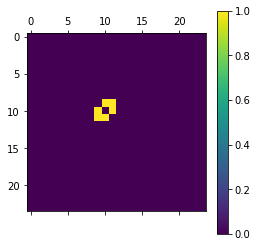

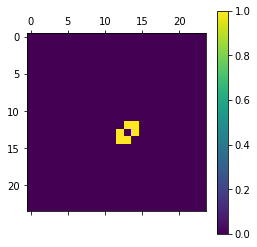

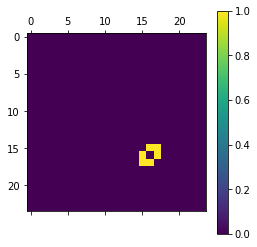

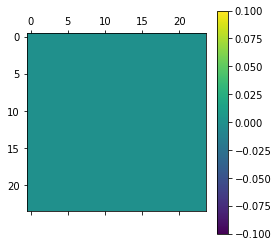

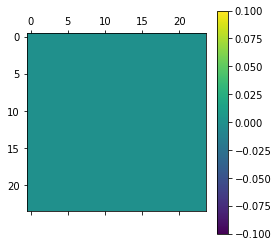

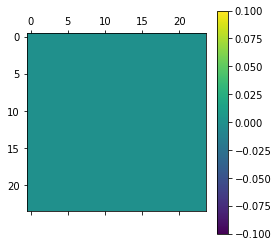

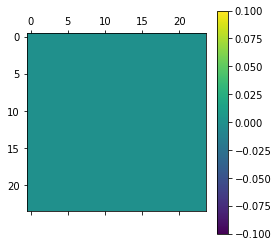

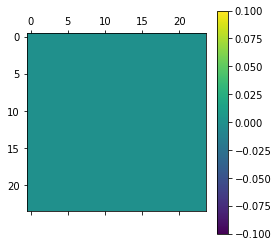

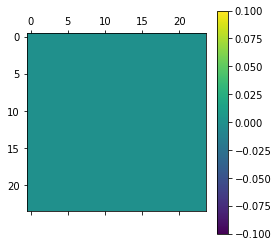

In [29]:
for ss in range(0,list_site.shape[0]):
    print("Site: %s" % list_site[ss])
    plt.matshow(all_site[:,:,ss])
    plt.colorbar()

# Scanner dummy variables

In [30]:
net = "MOT"
all_scanner = np.zeros([list_id.size,list_id.size,list_scanner.size])
for id1 in list_id:
    for id2 in list_id:
        mask = data.id1.isin([id1 , id2]) & data.id2.isin([id1 , id2])
        mask = mask & (data.Network==net)        
        if any(mask):
            scanner1 = data.Scanner1[mask].values
            scanner2 = data.Scanner2[mask].values
            all_scanner[list_id==id1,list_id==id2,list_scanner==scanner1] = scanner1==scanner2

Scanner type: GE
Scanner type: Philips
Scanner type: Siemens


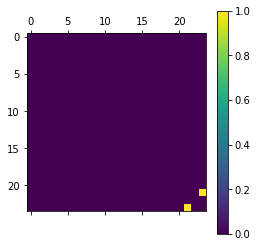

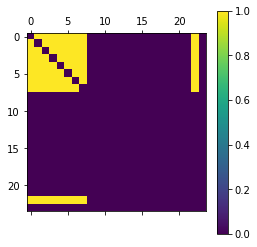

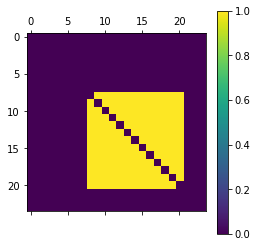

In [31]:
for ss in range(0,list_scanner.shape[0]):
    print("Scanner type: %s" % list_scanner[ss])
    plt.matshow(all_scanner[:,:,ss])
    plt.colorbar()

# Inter-scanner dummy variables

Size of Xscan:  (276, 3) 
Indices 2nd dimension: ['GE' 'Philips' 'Siemens']


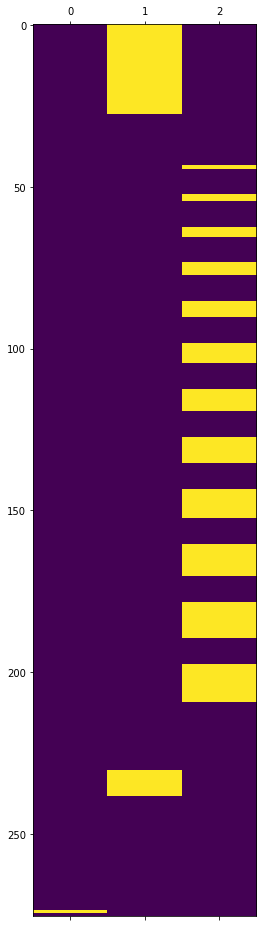

In [32]:
il = np.tril_indices(all_site.shape[0],-1)
Xscan = np.zeros([int(list_id.size*(list_id.size-1)/2) , list_scanner.size])
for sc in range(0,list_scanner.size):
    tmp = all_scanner[:,:,sc]
    Xscan[:,sc] = tmp[il]
plt.matshow(Xscan,aspect='auto')
print("Size of Xscan: ",Xscan.shape,"\nIndices 2nd dimension:", list_scanner)

In [33]:
Xs = np.zeros([int(list_id.size*(list_id.size-1)/2) , list_site.size])
for ss in range(0,list_site.size):
    tmp = all_site[:,:,ss]
    Xs[:,ss] = tmp[il]
mask_site = np.sum(Xs,axis=0)>0 # Check for sites which have test-retest data
Xs = Xs[:,mask_site]
print("Size of Xs: ",Xs.shape,"\nIndices 2nd dimension:", list_site[mask_site])

Size of Xs:  (276, 6) 
Indices 2nd dimension: ['CHUM' 'CHUS' 'CINQ' 'ISMD' 'IUGM' 'MNI']


array([1., 3., 3., 3., 3., 3.])

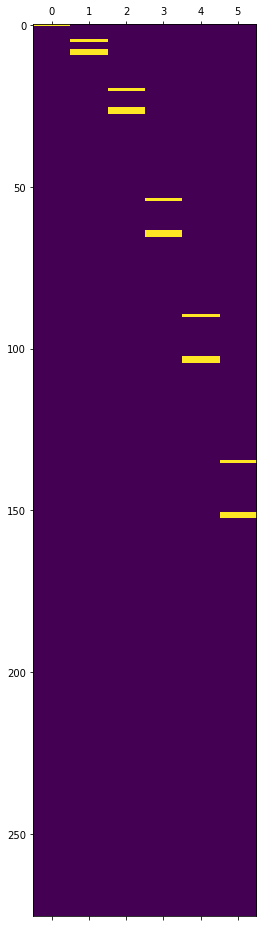

In [34]:
plt.matshow(Xs,aspect='auto')
np.sum(Xs,axis=0)

# Assembling the full model

In [35]:
X = np.concatenate([Xt , Xs, Xscan, Xtsnr, Xfd, Xvol], axis=1)
X = sm.add_constant(X)
X.shape

(276, 14)

# Running the regression

In [36]:
net = "CER"
Y = all_comp[net][il]
results = sm.OLS(Y, X).fit()
# labels = np.concatenate([['const', 'time'], list_site[mask_site], list_scanner[mask_scanner]])
labels = ['interscanner', 'time', 'CHUM', 'CHUS', 'CINQ', 'ISMD', 'IUGM', 'MNI', 'GE', 'Philips', 'Siemens', 'tsnr', 'FD', 'n_vols']
results.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.566
Date:                Mon, 20 May 2019   Prob (F-statistic):           4.74e-07
Time:                        23:27:40   Log-Likelihood:                 302.55
No. Observations:                 276   AIC:                            -577.1
Df Residuals:                     262   BIC:                            -526.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
interscanner     0.5993      0.007     90.708      0.000       0.586       0.612
time            -0.0016      0.005     -0.319      0.750      -0.012       0.008
CHUM             0.1293      0.085      1.522      0.129      -0.038       0.297
CHUS            -0.0221      0.051     -0.431      0.666      -0.123       0.079
CINQ             0.0038      0.050      0.075      0.940      -0.096       0.103
ISMD             0.1147      0.050      2.298      0.022       0.016       0.213
IUGM             0.0648      0.049      1.317      0.189      -0.032       0.162
MNI              0.1408      0.050      2.798      0.006       0.042       0.240
GE               0.1425      0.084      1.702      0.090      -0.022       0.307
Philips          0.0325      0.021      1.550      0.122      -0.009       0.074
Siemens          0.0545      0.012      4.407      0.000       0.030       0.079
tsnr             0.0081      0.010      0.838      0.403      -0.011       0.027
FD              -0.0007      0.009     -0.079      0.937      -0.019       0.017
n_vols          -0.0138      0.008     -1.814      0.071      -0.029       0.001
==============================================================================
Omnibus:                        6.086   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                4.809
Skew:                          -0.219   Prob(JB):                       0.0903
Kurtosis:                       2.525   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
for net in list_net:
    Y = all_comp[net][il]
    results = sm.OLS(Y, X).fit()
    # labels = np.concatenate([['const', 'time'], list_site[mask_site], list_scanner[mask_scanner]])
    labels = ['interscanner', 'time', 'CHUM', 'CHUS', 'CINQ', 'ISMD', 'IUGM', 'MNI', 'GE', 'Philips', 'Siemens', 
              'tsnr', 'FD', 'n_vols']
    results.summary(xname=labels)
    #test of intra-site effects 
    intra = results.f_test([0 , 0 , 1 , 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])
    inter = results.f_test([0 , 0 , 0 ,0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])
    print("Network: ", net, 
          "\nMean inter-vendor connectivity:", results.params[0],
          "; p-value: ", results.pvalues[0],
          "\nEffect of time (delta corr per year):", results.params[1],
          "; p-value: ", results.pvalues[1],
          "\nintra-site effect, F value: ", intra.fvalue[0][0],
          "; dof: ", intra.df_denom,
          "; p-value: ",intra.pvalue,
          "\ninter-vendor effect, F value: ", inter.fvalue[0][0],
          "; dof: ", inter.df_denom,
          "; p-value: ",inter.pvalue, 
          "\nEffect of tsnr (in std):", results.params[11],
          "; p-value: ", results.pvalues[11],
          "\nEffect of FD (in std):", results.params[12],
          "; p-value: ", results.pvalues[12],
          "\nEffect of n_vols (in std):", results.params[13],
          "; p-value: ", results.pvalues[13],
          "\n")

Network:  CER 
Mean inter-vendor connectivity: 0.5992946676544383 ; p-value:  6.461230020845507e-200 
Effect of time (delta corr per year): -0.001623272423337232 ; p-value:  0.7502807179398508 
intra-site effect, F value:  8.326268687944706 ; dof:  262.0 ; p-value:  0.004232869271895868 
inter-vendor effect, F value:  6.716961027014114 ; dof:  262.0 ; p-value:  0.010085770309628685 
Effect of tsnr (in std): 0.008120042133838372 ; p-value:  0.40270558381799737 
Effect of FD (in std): -0.0007234126904850898 ; p-value:  0.9372301269725012 
Effect of n_vols (in std): -0.013817747227910938 ; p-value:  0.07076530744403425 

Network:  DMN 
Mean inter-vendor connectivity: 0.6231495730638524 ; p-value:  2.0756192837181064e-209 
Effect of time (delta corr per year): -3.312883968459041e-05 ; p-value:  0.9945684256867946 
intra-site effect, F value:  0.8517037970818917 ; dof:  262.0 ; p-value:  0.3569198865155818 
inter-vendor effect, F value:  2.6695340630789914 ; dof:  262.0 ; p-value:  0.103486